Imports

In [1]:
from IPython.display import Markdown as md, display
import pandas as pd
from matplotlib import MatplotlibDeprecationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning
import data_processing as dproc
import plot as plot
import warnings

# ignore these warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=HessianInversionWarning)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

# Cleaning and analysing raw data

Southern Ring Road of Ljubljana  Var:  3374499.8176657874  Mean:  3057.687174541948


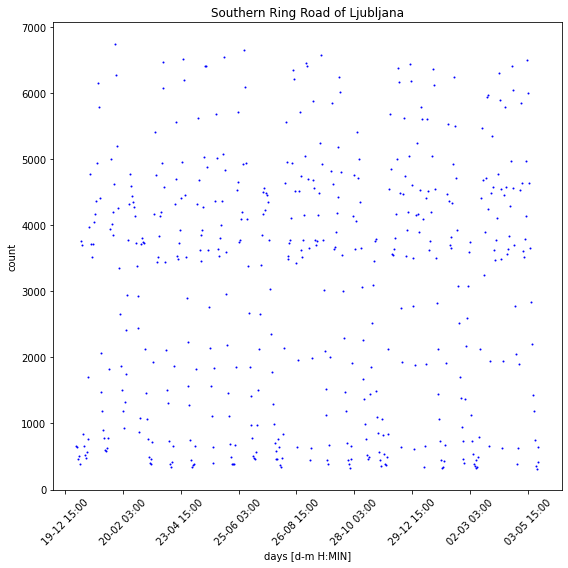

In [2]:
df = pd.read_csv(r'..\data\df_2019.csv')
df = dproc.clean_data(df)
plot.plot_raw_data([df], ["Southern Ring Road of Ljubljana"], [1500])

# Building models

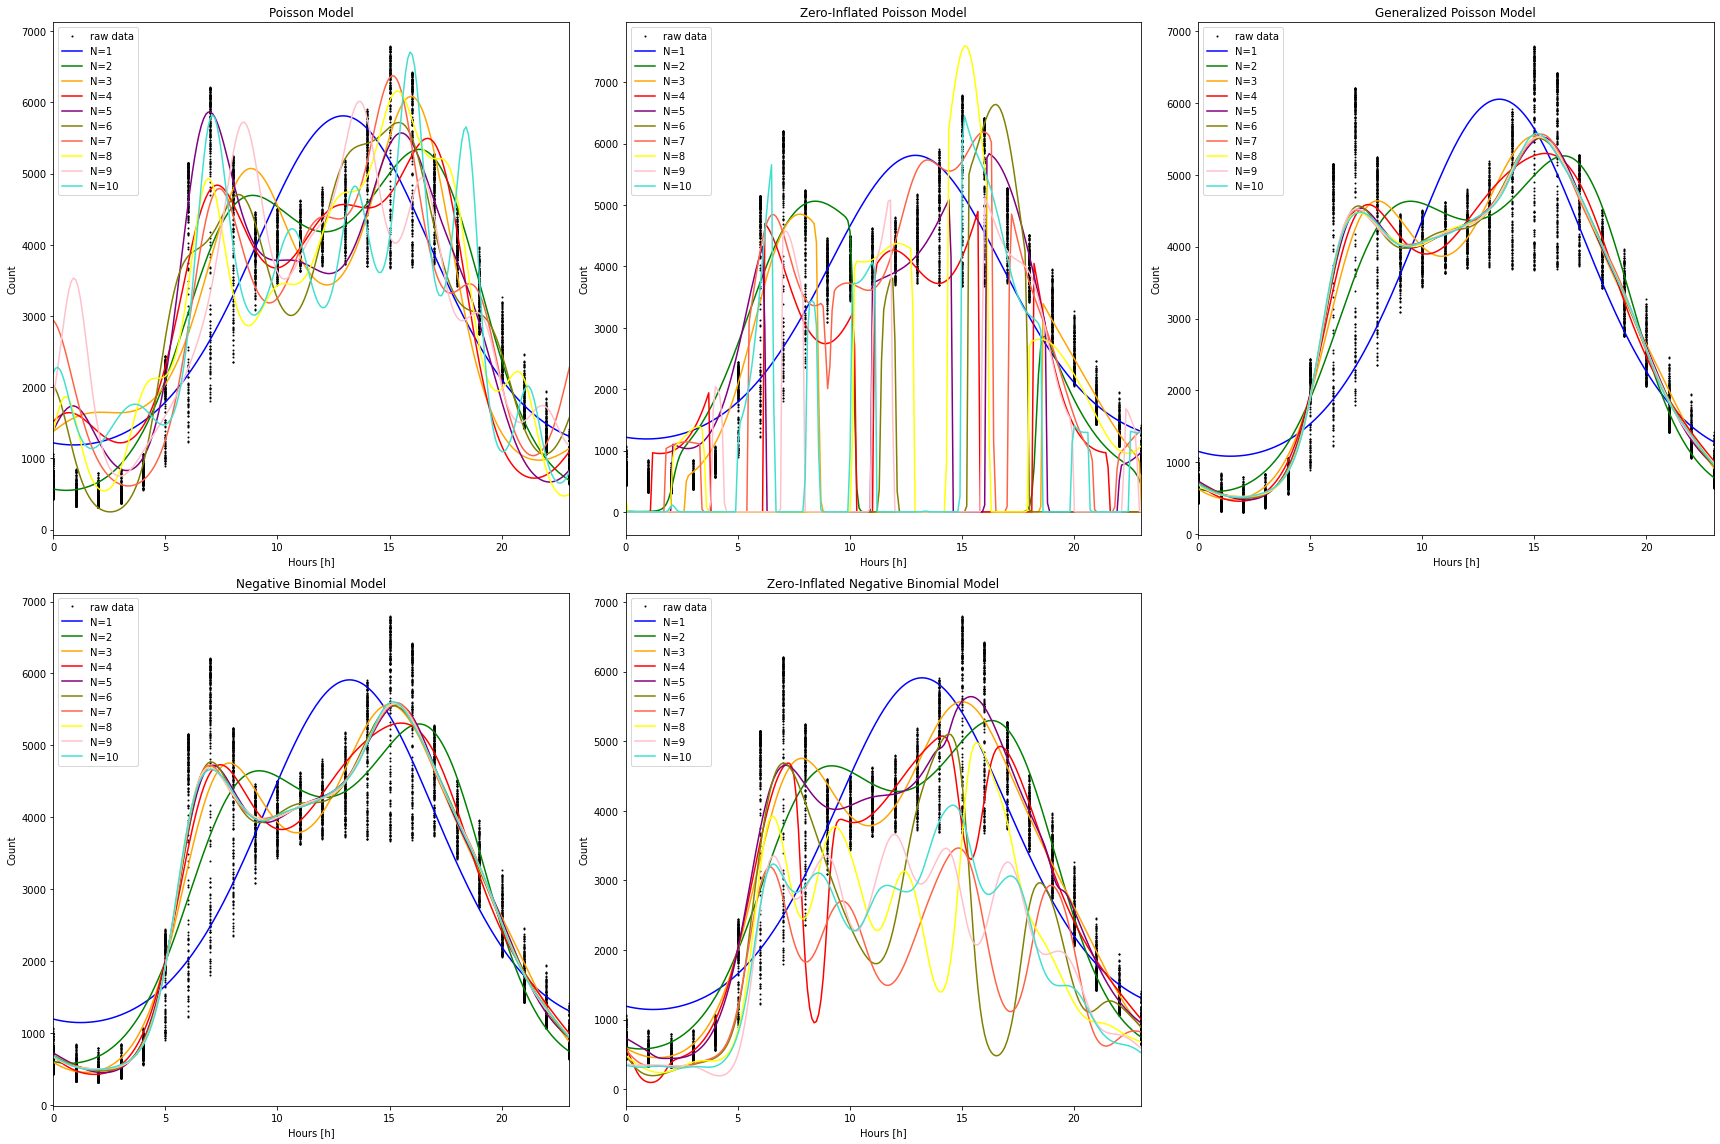

,model_type,n_components,amplitude,mesor,peaks,heights,p,RSS,AIC,BIC,log_likelihood,logs,mean(est),Y(est),X_test,Y_test
0,poisson,1,2310.54,3499.23,[12.91],[5809.77],1.110223e-16,6.362619e+09,2.203995e+06,2.204014e+06,-1.101994e+06,"[-144.59713541494375, -173.53495101465296, -39...",3057.620620,"[1188.8347200697049, 1226.1294089421456, 1332....","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1216.6987367192212, 1210.9481858920794, 1205...."
1,poisson,2,2394.40,2944.97,"[8.91, 16.32]","[4693.3, 5339.37]",1.110223e-16,2.812110e+09,9.105555e+05,9.105882e+05,-4.552727e+05,"[-12.627608722124478, -4.544606543997361, -145...",3057.730368,"[559.8745958094647, 663.7387179096863, 914.808...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[568.8963152647717, 563.0849741079613, 558.397..."
2,poisson,3,2553.28,3528.61,"[8.81, 15.92]","[5071.47, 6081.89]",1.110223e-16,5.190179e+09,2.272227e+06,2.272272e+06,-1.136106e+06,"[-348.1487725253346, -405.35268594016316, -604...",3056.904524,"[1580.213255109423, 1647.1666573262619, 1640.6...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1377.5429301410456, 1402.131816999017, 1426.1..."
3,poisson,4,2385.74,3108.04,"[7.31, 13.01, 16.72]","[4837.53, 4566.0, 5493.78]",1.110223e-16,3.874357e+09,1.958392e+06,1.958451e+06,-9.791869e+05,"[-372.2626177166003, -247.94651429017858, -318...",3055.653337,"[1621.246538080126, 1373.1143791723846, 1218.5...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1517.7994663845968, 1549.641989537944, 1577.2..."
4,poisson,5,2598.22,3265.88,"[7.01, 15.52]","[5864.1, 5570.54]",1.110223e-16,3.321464e+09,1.495688e+06,1.495760e+06,-7.478329e+05,"[-437.1734966692384, -187.0778220263196, -114....",3059.662989,"[1728.3966796072427, 1254.1624815321545, 850.2...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1392.02698751538, 1455.5108259559304, 1515.81..."
5,poisson,6,2734.34,2982.73,"[8.31, 15.42]","[4704.69, 5717.07]",1.110223e-16,3.267573e+09,1.249147e+06,1.249232e+06,-6.245606e+05,"[-53.80393256793286, -141.0284889246318, -43.0...",3056.654954,"[950.0830891269605, 307.9352825356589, 292.319...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[2023.860450655596, 1972.6109967687783, 1899.4..."
6,poisson,7,2880.35,3493.82,"[7.41, 15.12]","[4789.94, 6374.17]",1.110223e-16,4.932691e+09,2.124078e+06,2.124176e+06,-1.062024e+06,"[-554.630170220672, -66.53981133647312, -31.70...",3060.065124,"[1912.7391542641271, 966.8474566179855, 634.01...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[2939.4026996191983, 2896.4976296860627, 2832...."
7,poisson,8,2842.97,3313.83,"[6.91, 15.32, 17.22]","[4931.03, 6156.8, 5211.45]",1.110223e-16,3.640825e+09,1.505147e+06,1.505258e+06,-7.525565e+05,"[-314.5310284812431, -7.201294524106288, -113....",3059.369994,"[1521.6869377520825, 580.4789726589372, 849.28...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1373.0554927651867, 1512.0730219562884, 1639...."
8,poisson,9,2630.43,3381.12,"[8.51, 13.61, 16.42]","[5723.12, 6011.55, 4942.92]",1.110223e-16,7.312447e+09,2.709145e+06,2.709269e+06,-1.354553e+06,"[-1749.5451583849672, -270.79904169063275, -71...",3113.894933,"[3507.939122113199, 1415.4162953069479, 750.60...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1863.2984541281621, 2062.970536334271, 2284.2..."
9,poisson,10,3026.52,3678.16,"[7.11, 15.92, 18.42]","[5819.24, 6704.67, 5654.44]",1.110223e-16,6.044707e+09,2.471741e+06,2.471879e+06,-1.235849e+06,"[-288.8934516628183, -151.9134377875357, -589....",3010.262505,"[1475.8734489462518, 1179.8398694540285, 1619....","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[2206.9183696878517, 2265.5764469419105, 2277...."


In [3]:
models_type = ['poisson', 'zero_poisson', 'gen_poisson', 'nb', 'zero_nb']
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# fit to models
df_results = dproc.fit_to_models(df, models_type, n_components)
df_results.to_csv(r'results\results.csv')
display(df_results)

# Comparing fitted models
## First compare by model type

In [4]:
best_model_type = dproc.get_best_model_type(df_results, 'Vuong')
print("Best model: {}".format(best_model_type.model_type))
best_model = dproc.get_best_n_components(df_results, 'Vuong', model_type=best_model_type['model_type'])
print("Number of components: {}".format(best_model.n_components))

Best model: gen_poisson
Number of components: 9


## First compare by number of components

In [5]:
best_n_components = dproc.get_best_n_components(df_results, 'Vuong')
print("Number of components: {}".format(best_n_components.n_components))
best_model = dproc.get_best_model_type(df_results, 'Vuong', n_components=best_n_components['n_components'])
print("Best model: {}".format(best_model.model_type))

Number of components: 7
Best model: gen_poisson


We will use the result from the second comparison as the best model.

In [6]:
model_type = best_model.model_type
n_component = int(best_model.n_components)
print("Best model: {}  Number of components: {}".format(best_model.model_type,best_model.n_components))

Best model: gen_poisson  Number of components: 7


# Plot model and CIs

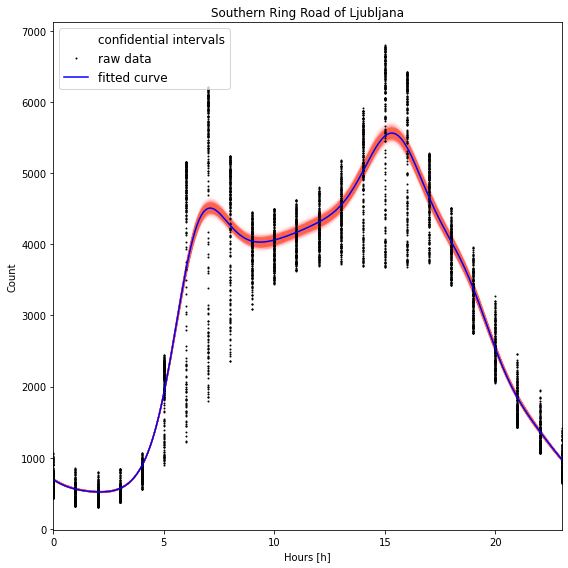

Confidential intervals of model:


,0,1
0,7.771561,7.777424
1,-0.309035,-0.296137
2,-0.987040,-0.975963
3,-0.233642,-0.226659
4,-0.377098,-0.363087
5,-0.186394,-0.173229
6,0.078762,0.087180
7,0.005369,0.015954
8,0.072680,0.083894
9,0.051025,0.063910


In [7]:
CIs=plot.plot_model(df, model_type, n_component, title='Southern Ring Road of Ljubljana')
print('Confidential intervals of model:')
display(CIs)

# Plot only CIs

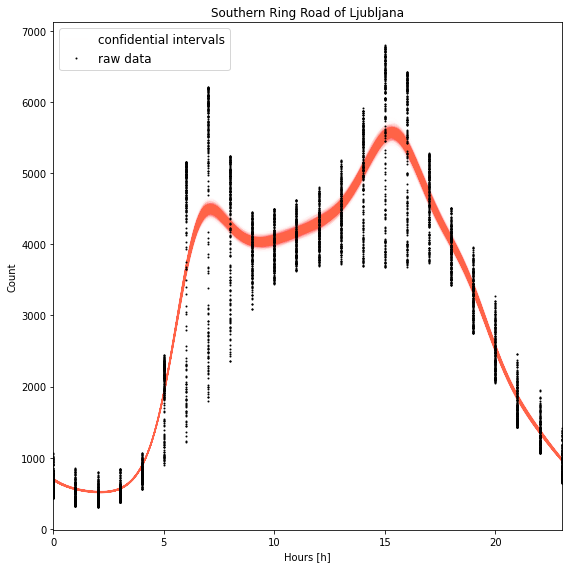

In [8]:
CIs=plot.plot_confidential_intervals(df, model_type, n_component, title='Southern Ring Road of Ljubljana')
CIs.to_csv(r'results\CI.csv')

# Calculate CIs of rhythm parameters

In [9]:
CIs_params=dproc.calculate_confidential_intervals_parameters(df, n_component, model_type,best_model['peaks'])
best_model = best_model.append(pd.Series(CIs_params))
best_model=best_model[['model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
best_model.to_frame().to_csv(r'results\CI_rhythm.csv')
print('Rhythm parameters and its confidential intervals:')
display(best_model.to_frame())

Rhythm parameters and its confidential intervals:


,0
model_type,gen_poisson
n_components,7
amplitude,2522.63
mesor,3041.3
peaks,"[7.11, 15.32]"
heights,"[4509.59, 5563.93]"
amplitude_CIs,"[2474.75, 2566.95]"
mesor_CIs,"[2987.32, 3085.91]"
peaks_CIs,"[[6.95, 7.21], [15.18, 15.42]]"
heights_CIs,"[[4426.63, 4663.54], [5462.9, 5652.03]]"


# Compare by one component - effect of COVID-19
Datasets have been pre-cleaned, we removed outliers using function clean_data() from data_processing module.
Function compare_by_component() builds and evaluates models for each case separately. Next, it calculates CIs of model and rhythm parameters.
## All days

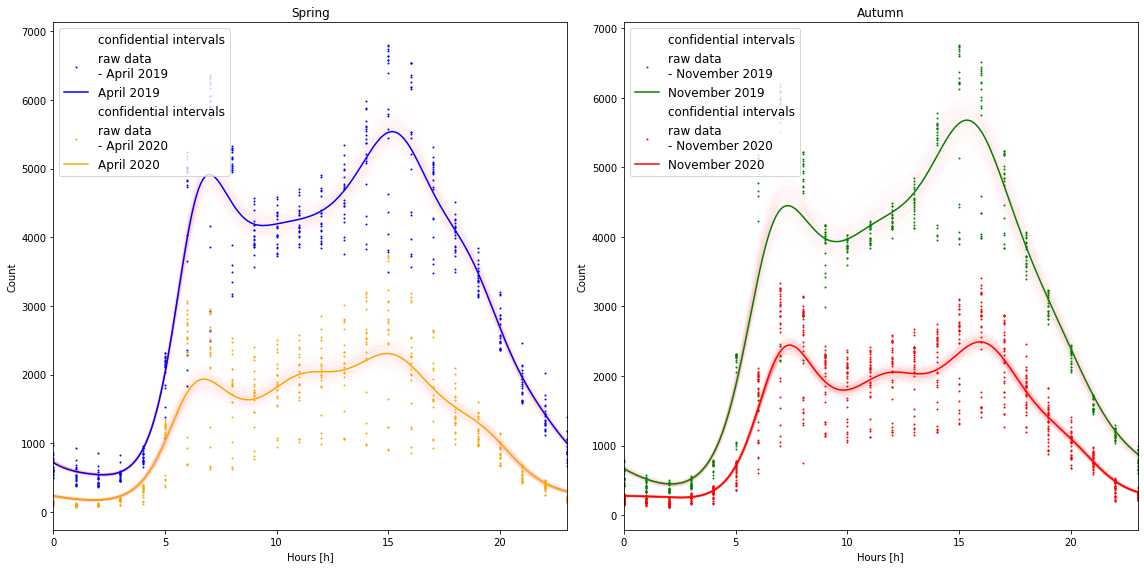

,observation_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs
0,April 2019,gen_poisson,7.0,2498.82,3040.38,"[7.01, 15.22]","[4915.05, 5539.2]","[2384.98, 2662.64]","[2920.75, 3198.2]","[[6.76, 7.17], [14.88, 15.58]]","[[4666.28, 5200.15], [5306.83, 5859.73]]"
1,November 2019,gen_poisson,5.0,2616.01,3063.86,"[7.31, 15.32]","[4450.6, 5679.88]","[2469.92, 2757.02]","[2919.55, 3208.69]","[[7.01, 7.78], [15.14, 15.61]]","[[4188.29, 4813.77], [5391.0, 5964.2]]"
2,April 2020,gen_poisson,5.0,1065.90,1241.10,"[6.71, 11.91, 14.91]","[1933.02, 2042.0, 2307.0]","[952.73, 1184.87]","[1125.57, 1360.04]","[[6.52, 7.12], [11.13, 12.02], [14.32, 15.29]]","[[1798.89, 2091.56], [1955.82, 2120.11], [2078..."
3,November 2020,gen_poisson,5.0,1118.82,1371.95,"[7.41, 12.21, 15.92]","[2445.32, 2057.38, 2490.77]","[1066.17, 1200.14]","[1315.92, 1453.57]","[[7.26, 7.57], [11.53, 12.74], [15.72, 16.11]]","[[2276.42, 2578.6], [1995.94, 2129.07], [2373...."


In [10]:
df_covid = pd.read_csv(r'..\data\df_covid.csv')
df_results = dproc.compare_by_component(df_covid, 'observation_period', n_components, models_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='comparison1.pdf')
df_results=df_results[['observation_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
df_results.to_csv(r'results\covid.csv')
display(df_results)

## Only weekends

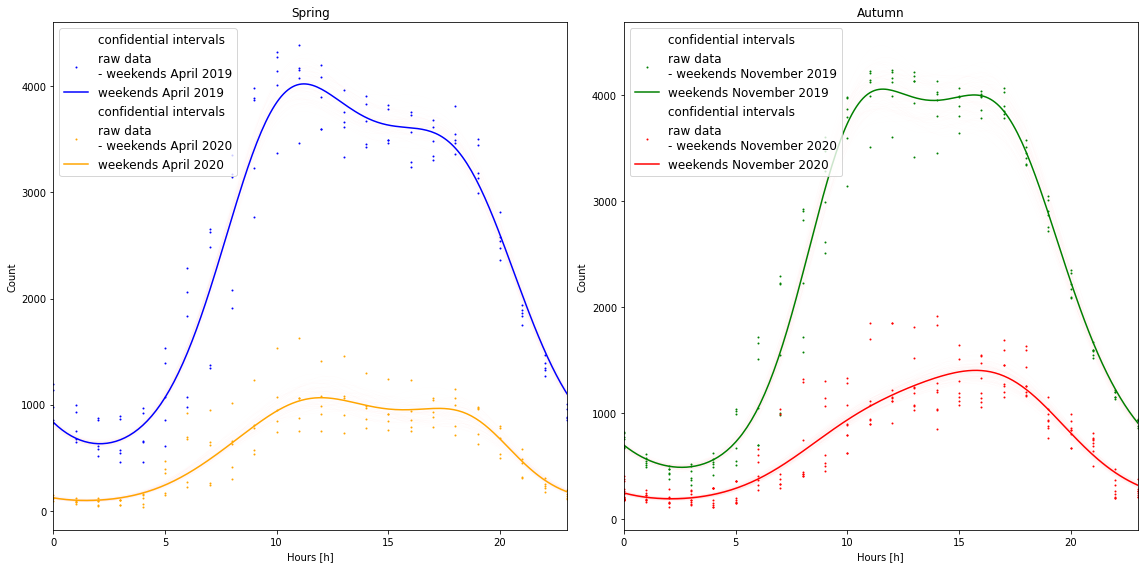

,observation_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs
0,weekends April 2019,gen_poisson,2.0,1694.28,2326.76,[11.21],[4021.03],"[1615.79, 1774.72]","[2262.42, 2399.47]","[10.57, 11.8]","[3887.3, 4165.1]"
1,weekends November 2019,gen_poisson,3.0,1781.03,2272.28,"[11.61, 15.72]","[4053.3, 3998.37]","[1736.68, 1817.59]","[2230.36, 2308.83]","[[10.96, 12.24], [15.28, 16.05]]","[[3941.76, 4127.98], [3959.68, 4059.7]]"
2,weekends April 2020,gen_poisson,3.0,483.76,582.08,"[12.01, 17.22]","[1065.84, 965.17]","[455.3, 530.27]","[548.93, 633.85]","[[11.14, 13.04], [16.68, 17.85]]","[[1005.85, 1162.5], [931.38, 1018.11]]"
3,weekends November 2020,gen_poisson,2.0,604.73,799.73,[15.72],[1404.46],"[580.14, 635.73]","[777.4, 828.29]","[15.39, 16.16]","[1359.53, 1462.03]"


In [11]:
df_covid = pd.read_csv(r'..\data\df_covid_weekends.csv')
df_results = dproc.compare_by_component(df_covid, 'observation_period', n_components, models_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='comparison2.pdf')
df_results=df_results[['observation_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
df_results.to_csv(r'results\covid_weekdays.csv')
display(df_results)

## Only work days

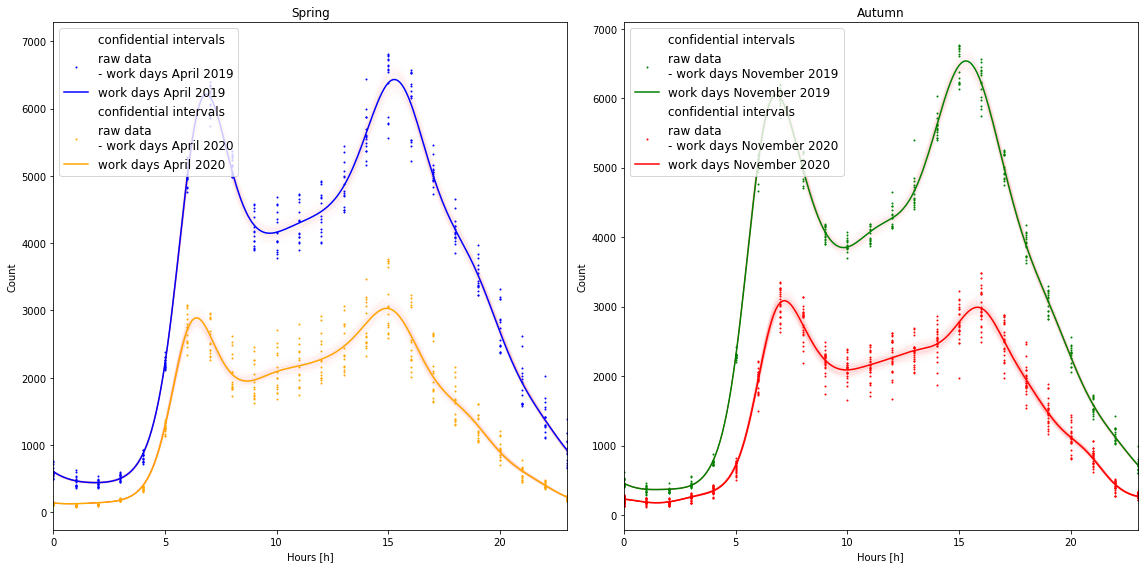

,observation_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs
0,work days April 2019,gen_poisson,7.0,2995.54,3437.10,"[6.81, 15.32]","[6217.27, 6432.65]","[2931.83, 3054.88]","[3376.11, 3495.28]","[[6.75, 6.92], [15.17, 15.39]]","[[6156.76, 6281.33], [6308.78, 6549.32]]"
1,work days November 2019,gen_poisson,8.0,3084.91,3451.80,"[6.81, 15.32]","[6052.79, 6536.7]","[3045.91, 3131.48]","[3411.15, 3495.55]","[[6.81, 6.81], [15.27, 15.36]]","[[6006.09, 6078.75], [6458.03, 6626.05]]"
2,work days April 2020,gen_poisson,7.0,1452.39,1579.27,"[6.41, 14.91]","[2892.09, 3031.66]","[1388.73, 1545.71]","[1513.7, 1670.53]","[[6.36, 6.48], [14.72, 15.17]]","[[2815.41, 3007.64], [2898.21, 3218.78]]"
3,work days November 2020,gen_poisson,9.0,1454.55,1631.44,"[7.21, 15.82]","[3085.99, 2991.33]","[1425.7, 1482.62]","[1603.34, 1656.59]","[[7.07, 7.27], [15.62, 16.02]]","[[3026.23, 3140.24], [2953.37, 3071.41]]"


In [12]:
df_covid = pd.read_csv(r'..\data\df_covid_workdays.csv')
df_results = dproc.compare_by_component(df_covid, 'observation_period', n_components, models_type, ax_indices=[0, 1, 0, 1],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='comparison3.pdf')
df_results=df_results[['observation_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
df_results.to_csv(r'results\covid_workdays.csv')
display(df_results)